In [18]:
import numpy as np
import cv2 as cv
import seaborn_image as isns
%matplotlib inline
img = cv.imread('./data/images/0.png')

In [28]:
kernel = np.ones((3,3),np.uint8)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.1*dist_transform.max(),255,0)

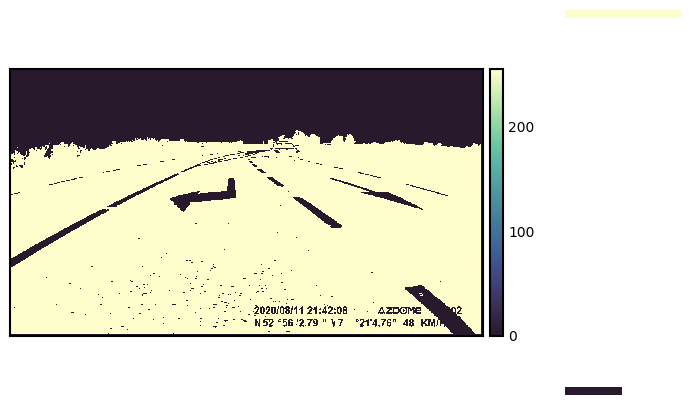

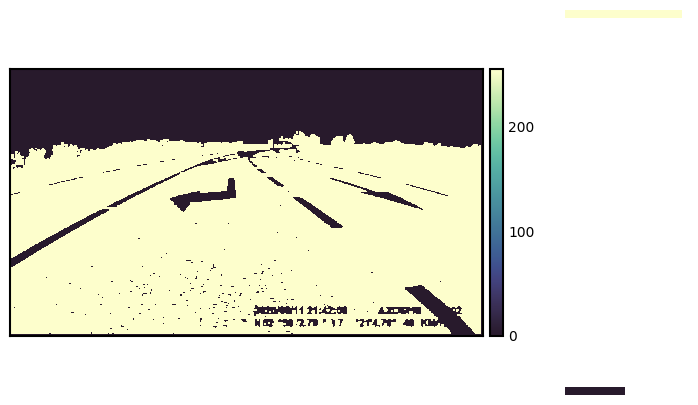

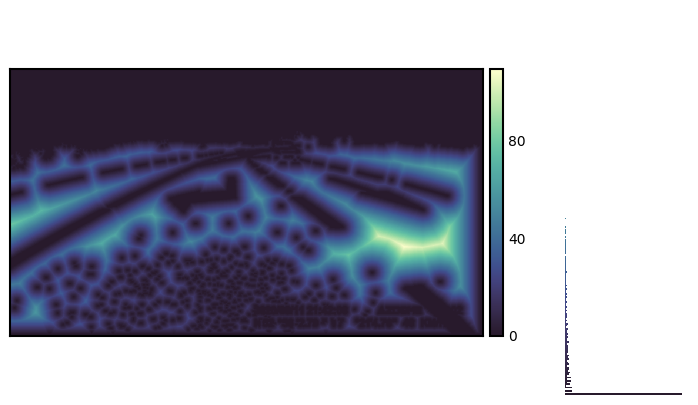

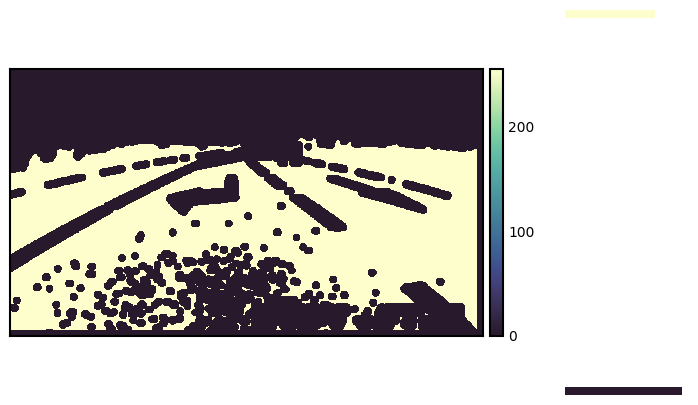

In [30]:
isns.imghist(thresh)
isns.imghist(opening)
isns.imghist(dist_transform)
isns.imghist(sure_fg)
print()

<Axes: >

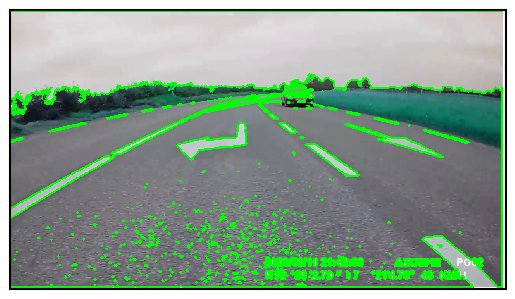

In [36]:
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_TC89_KCOS)
cv.drawContours(img, contours, -1, (0, 255, 0), 3)
isns.imgplot(img)